In [559]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture et nettoyage des données

### Population

In [498]:
df_population = pd.read_csv('population.csv', sep=';')

In [499]:
df_population['Valeur']*=1000

In [500]:
df_population.head(10)

,Zone,Année,Valeur
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0
5,Afghanistan,2018,37171921.0
6,Afrique du Sud,2013,53687121.0
7,Afrique du Sud,2014,54544186.0
8,Afrique du Sud,2015,55386367.0
9,Afrique du Sud,2016,56207646.0


### Disponibilité alimentaire

In [501]:
df_dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv', sep=';')

In [502]:
df_dispo_alimentaire.fillna(0,inplace=True)

In [503]:
colonnes_convertir= ['Aliments pour animaux', 'Disponibilité intérieure', 'Exportations - Quantité',
                        'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
                        'Semences', 'Traitement', 'Variation de stock', 'Autres Utilisations']

In [504]:
for colonnes in colonnes_convertir: 
    df_dispo_alimentaire[colonnes]*=1000000

In [505]:
df_dispo_alimentaire.head(10)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,5.300000e+07,0.0,0.000000e+00,5.300000e+07,0.0,5.300000e+07,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,4.100000e+07,2000000.0,4.000000e+07,3.900000e+07,2000000.0,3.000000e+06,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.000000e+06,0.0,2.000000e+06,2.000000e+06,0.0,0.000000e+00,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,8.200000e+07,0.0,8.200000e+07,8.200000e+07,0.0,0.000000e+00,0.0,0.0,0.0
5,Afghanistan,"Beurre, Ghee",animale,0.0,0.0,23.0,1.17,2.61,0.03,3.600000e+07,0.0,0.000000e+00,3.600000e+07,0.0,3.600000e+07,0.0,0.0,0.0
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3.000000e+06,0.0,3.000000e+06,3.000000e+06,0.0,0.000000e+00,0.0,0.0,0.0
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0
8,Afghanistan,Boissons Alcooliques,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
9,Afghanistan,Café,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0


### Aide alimentaire

In [506]:
df_aide_alimentaire = pd.read_csv('aide_alimentaire.csv', sep=';')

In [507]:
df_aide_alimentaire['Valeur']*=1000

In [508]:
df_aide_alimentaire.head(10)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000
5,Afghanistan,2014,Céréales,15989000
6,Afghanistan,2013,"Fruits secs, total",85000
7,Afghanistan,2013,Huiles végétales,11087000
8,Afghanistan,2014,Huiles végétales,8185000
9,Afghanistan,2013,"Légumineuses Sèches,Tot.",11761000


### Sous nutrition

In [509]:
df_sous_nutrition = pd.read_csv('sous_nutrition.csv', sep=';')

In [510]:
df_sous_nutrition['Valeur'] = pd.to_numeric(df_sous_nutrition['Valeur'], errors='coerce')
df_sous_nutrition.fillna(0, inplace=True)

In [511]:
df_sous_nutrition.rename(columns={"Valeur": "Valeur_sous_nutrition"}, inplace=True)
df_sous_nutrition['Valeur_sous_nutrition'] *= 1000000

In [512]:
df_sous_nutrition.head(10)

,Zone,Année,Valeur_sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0
5,Afghanistan,2017-2019,11100000.0
6,Afrique du Sud,2012-2014,2200000.0
7,Afrique du Sud,2013-2015,2500000.0
8,Afrique du Sud,2014-2016,2800000.0
9,Afrique du Sud,2015-2017,3000000.0


# Questions de Marc

#### Informations sur les données de 2017

In [513]:
df_pop_2017 =df_population.loc[df_population['Année'] == 2017,["Zone", "Valeur"]]
df_sous_nut=df_sous_nutrition.loc[df_sous_nutrition['Année'] == '2016-2018',["Zone", "Valeur_sous_nutrition"]]
df_population_sous_nutrition=pd.merge(df_pop_2017, df_sous_nut, on = 'Zone')

df_population_sous_nutrition.head()

,Zone,Valeur,Valeur_sous_nutrition
0,Afghanistan,36296113.0,10500000.0
1,Afrique du Sud,57009756.0,3100000.0
2,Albanie,2884169.0,100000.0
3,Algérie,41389189.0,1300000.0
4,Allemagne,82658409.0,0.0


### Question 1: Proportion de personnes en état de sous nutrition

In [650]:
prop_personnes=(df_population_sous_nutrition["Valeur_sous_nutrition"].sum()*100)/df_population_sous_nutrition.Valeur.sum()
print("Proportion de personnes en état de sous nutrition :", "{:.2f}".format(prop_personnes),"%")

autres=round((df_population_sous_nutrition['Valeur']-df_population_sous_nutrition["Valeur_sous_nutrition"]).sum()*100/df_population_sous_nutrition.Valeur.sum(), 2)
print("Proportion de personnes qui reçoivent un apport alimentaire suffisant:", "{:.2f}".format(autres),"%")

Proportion de personnes en état de sous nutrition : 7.10 %
Proportion de personnes qui reçoivent un apport alimentaire suffisant: 92.90 %


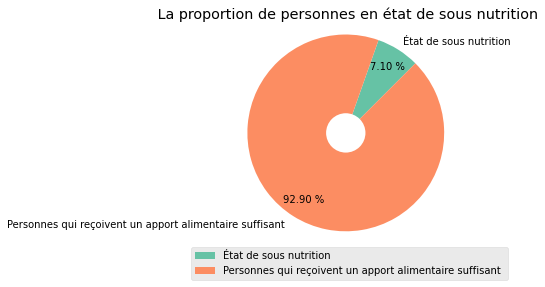

In [654]:
proportion = [prop_personnes, autres]
labels = ["État de sous nutrition", 'Personnes qui reçoivent un apport alimentaire suffisant ']
colors=sns.color_palette("Set2")

explode = (.2,0)
plt.style.use('ggplot')
plt.title(' La proportion de personnes en état de sous nutrition')
plt.pie(proportion, labels=labels, autopct="%0.2f %%", pctdistance=0.8, startangle=45, colors =colors)
plt.axis('equal')
plt.legend(loc="upper right", bbox_to_anchor=(1,0))
circle=plt.Circle(xy=(0,0), radius=.20, facecolor='white')
plt.gca().add_artist(circle)

plt.show()

### Question 2: Nombre théorique de personnes qui pourraient être nourries

In [567]:
df_total_dispo_global = df_dispo_alimentaire.merge(df_population.loc[df_population['Année'] == 2017,["Zone", "Valeur"]],
                                            on='Zone')
df_total_dispo_global['dispo_kcal']=df_total_dispo_global['Disponibilité alimentaire (Kcal/personne/jour)']*df_total_dispo_global['Valeur']*365

print("Disponibilité alimentaire totale en kcal :", df_total_dispo_global['dispo_kcal'].sum(), "kcal")
print("Le nombre théorique de personnes qui pourraient être nourris {} ".format(round(df_total_dispo_global['dispo_kcal'].sum()/(2500*365))))

Disponibilité alimentaire totale en kcal : 5995412811563315.0 kcal
Le nombre théorique de personnes qui pourraient être nourris 6570315410 


### Question 3: Disponibilité alimentaire des produits végétaux (année 2017)

In [561]:
df_dispo_alimentaire['dispo_kcal'] = df_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'] * df_pop_2017['Valeur'] * 365
df_vegetaux=df_dispo_alimentaire.loc[df_dispo_alimentaire['Origine'] == "vegetale",:]

total_vegetaux=df_dispo_alimentaire['dispo_kcal'].sum()
print("Disponibilité total de vegetaux {} kcal".format(round(total_vegetaux)))

total_ps_nourris_veg=total_vegetaux/(2500*365)
print("Nombre de personnes qui pourraient être nourris {} ".format(total_ps_nourris_veg))

porcentage=total_ps_nourris_veg*100/df_pop_2017['Valeur'].sum()*100
print("Porcentage qui pourraient être nourris:", "{:.2f}".format(porcentage), "%")

Disponibilité total de vegetaux 62773691449500 kcal
Nombre de personnes qui pourraient être nourris 68793086.52 
Porcentage qui pourraient être nourris: 91.14 %


### Question 4: Utilisation de la disponibilité intérieure

In [517]:
dispo_int = df_dispo_alimentaire['Disponibilité intérieure'].sum()

#### Les disponibilités alimentaires intérieures

In [662]:
dispo_animale=round(df_dispo_alimentaire["Aliments pour animaux"].sum()*100/dispo_int, 2)
print("Proportion de aliments pour animaux:", "{:.2f}".format(dispo_animale),"%")

pertes=round(df_dispo_alimentaire["Pertes"].sum()*100/dispo_int, 2)
print("Proportion de pertes:", "{:.2f}".format(pertes),"%")

dispo_humaine=round(df_dispo_alimentaire["Nourriture"].sum()/dispo_int*100, 2)
print("Proportion de aliments pour les humains:", "{:.2f}".format(dispo_humaine),"%")

autres=round(df_dispo_alimentaire["Autres Utilisations"].sum()/dispo_int*100, 2)
print("Proportion de autres:", "{:.2f}".format(autres),"%")

semences=round(df_dispo_alimentaire["Semences"].sum()/dispo_int*100, 2)
print("Proportion de semences:", "{:.2f}".format(semences),"%")

traitement=round(df_dispo_alimentaire["Traitement"].sum()/dispo_int*100, 2)
print("Proportion de traitement:", "{:.2f}".format(traitement),"%")

Proportion de aliments pour animaux: 13.24 %
Proportion de pertes: 4.61 %
Proportion de aliments pour les humains: 49.51 %
Proportion de autres: 8.78 %
Proportion de semences: 1.57 %
Proportion de traitement: 22.38 %


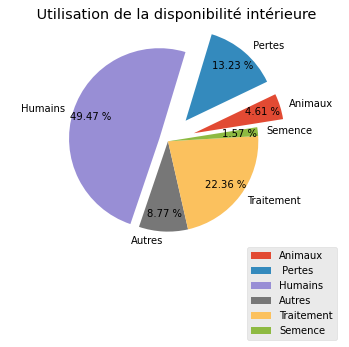

In [663]:
proportion = [4.61, 13.24, 49.51, 8.78, 22.38, 1.57]
disponibilité = ["Animaux", " Pertes", "Humains","Autres", "Traitement", "Semence"]
explode = (.3,.3,.1,0,0,0)
plt.style.use('ggplot')
plt.title(' Utilisation de la disponibilité intérieure')
plt.pie(proportion, labels=disponibilité, autopct="%0.2f %%", pctdistance=0.8, startangle=9, explode=explode)
plt.axis('equal')
plt.legend(loc="upper right", bbox_to_anchor=(1,0))


plt.show()

# Questions Julien 

#### L'utilisation des céréales 

Liste de céréales

In [521]:
cereales = ["Blé et produits", "Riz et produits", "Orge et produits", "Maïs et produits", "Seigle et produits",
                  "Avoine", "Millet et produits", "Sorgho et produits", "Céréales, Autres"]

In [522]:
df_cereales = df_dispo_alimentaire.loc[df_dispo_alimentaire['Produit'].isin(cereales),:]

### Question 1: Les proportions

 #### Proportion alimentation humaine / alimentation animaux

In [660]:
proportion_alimentaire_humaine=round(df_cereales['Nourriture'].sum()*100/df_cereales['Disponibilité intérieure'].sum(),2 )
print("Proportion des céréales dans l'alimentation humaine:", "{:.2f}".format(proportion_alimentaire_humaine),"%")

proportion_alimentaire_animaux=round(df_cereales['Aliments pour animaux'].sum()*100/df_cereales['Disponibilité intérieure'].sum(), 2)
print("Proportion des céréales dans l'alimentation pour animaux:", "{:.2f}".format(proportion_alimentaire_animaux),"%")

autres=round((df_cereales['Disponibilité intérieure']-df_cereales['Aliments pour animaux']- df_cereales['Nourriture']).sum()*100/df_cereales['Disponibilité intérieure'].sum(), 2)
print("Proportion des céréales dans l'alimentation pour autres:", "{:.2f}".format(autres),"%")

Proportion des céréales dans l'alimentation humaine: 18.13 %
Proportion des céréales dans l'alimentation pour animaux: 69.34 %
Proportion des céréales dans l'alimentation pour autres: 12.53 %


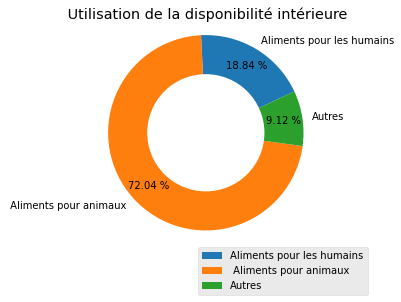

In [666]:
proportion = [proportion_alimentaire_humaine, proportion_alimentaire_animaux, autres]
labels = ["Aliments pour les humains", " Aliments pour animaux", "Autres"]

colors = ('tab:blue', 'tab:orange', 'tab:green')
explode = (.2,0)
plt.style.use('ggplot')
plt.title(' Utilisation de la disponibilité intérieure')
plt.pie(proportion, labels=labels, autopct="%0.2f %%", pctdistance=0.8, startangle=25, colors =colors)
plt.axis('equal')
plt.legend(loc="upper right", bbox_to_anchor=(1,0))
circle=plt.Circle(xy=(0,0), radius=.60, facecolor='white')
plt.gca().add_artist(circle)

plt.show()

### Question 2: Utilisation du manioc par la Thaïlande

#### Proportion de personnes en état de sous nutrition en Thaïlande

In [525]:
thai = (df_population_sous_nutrition.loc[df_population_sous_nutrition['Zone'] == 'Thaïlande',:]*100)
thai_sous_nutrition=(thai['Valeur_sous_nutrition'].iloc[0]*100/thai['Valeur'].iloc[0])

print("Proportion de personnes en état de sous nutrition :", "{:.2f}".format(thai_sous_nutrition),"%")

Proportion de personnes en état de sous nutrition : 8.96 %


#### La production de manioc en Thaïlande

In [526]:
dispo_thai_manioc=df_dispo_alimentaire.loc[(df_dispo_alimentaire['Produit'] == "Manioc") & (df_dispo_alimentaire['Zone'] == "Thaïlande"),:]
dispo_thai_manioc.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
13809,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,0.14,6.264000e+09,2.521400e+10,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0,NaN


#### Utilisation de la disponibilité intérieure

In [649]:
manioc_export=dispo_thai_manioc['Exportations - Quantité'].iloc[0]*100/dispo_thai_manioc['Production'].iloc[0]
print("La proportion de Manioc exporté :", "{:.2f}".format(manioc_export),"%")

manioc_cons_int=round((dispo_thai_manioc['Production']-dispo_thai_manioc['Exportations - Quantité']).sum()*100)/dispo_thai_manioc['Production'].iloc[0]
print("La proportion de manioc consommation intérieure :", "{:.2f}".format(manioc_cons_int),"%")

La proportion de Manioc exporté : 83.41 %
La proportion de manioc consommation intérieure : 16.59 %


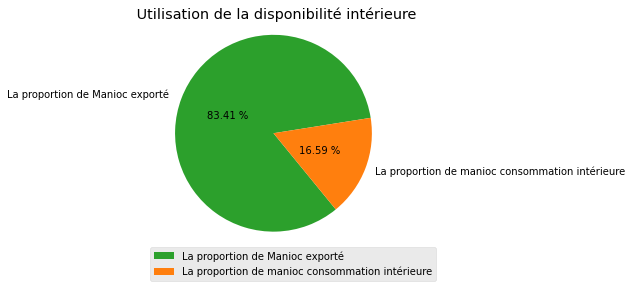

In [616]:
proportion = [83.41, 16.59]
disponibilité = ['La proportion de Manioc exporté ', 'La proportion de manioc consommation intérieure']
colors = ('tab:green', 'tab:orange')
explode = (0,0)
plt.style.use('ggplot')
plt.title(' Utilisation de la disponibilité intérieure')
plt.pie(proportion, labels=disponibilité, autopct="%0.2f %%", pctdistance=0.5, startangle=9, explode=explode, colors =colors)
plt.axis('equal')
plt.legend(loc="upper right", bbox_to_anchor=(1,0))

# Questions Mélanie

#### Étude un peu plus fine pour chacun des pays

In [528]:
df_sous_nutrition.head()

,Zone,Année,Valeur_sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


In [529]:
df_total_dispo_global.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Valeur,dispo_kcal
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,36296113.0,6.624041e+10
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0,1.324808e+10
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,1.324808e+10
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0,0.000000e+00
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,5.299232e+10


### Question 1: Le pays pour lesquels la proportion de personnes sous-alimentées est la plus fort

In [530]:
df_population_sous_nutrition['pourcentage']=df_population_sous_nutrition['Valeur_sous_nutrition']/df_population_sous_nutrition['Valeur']
df_population_sous_nutrition[["Zone", "pourcentage"]].sort_values('pourcentage',ascending=False).head(10)

,Zone,pourcentage
78,Haïti,0.482592
157,République populaire démocratique de Corée,0.471887
108,Madagascar,0.410629
103,Libéria,0.382797
100,Lesotho,0.382494
183,Tchad,0.379576
161,Rwanda,0.350556
121,Mozambique,0.328109
186,Timor-Leste,0.321735
0,Afghanistan,0.289287


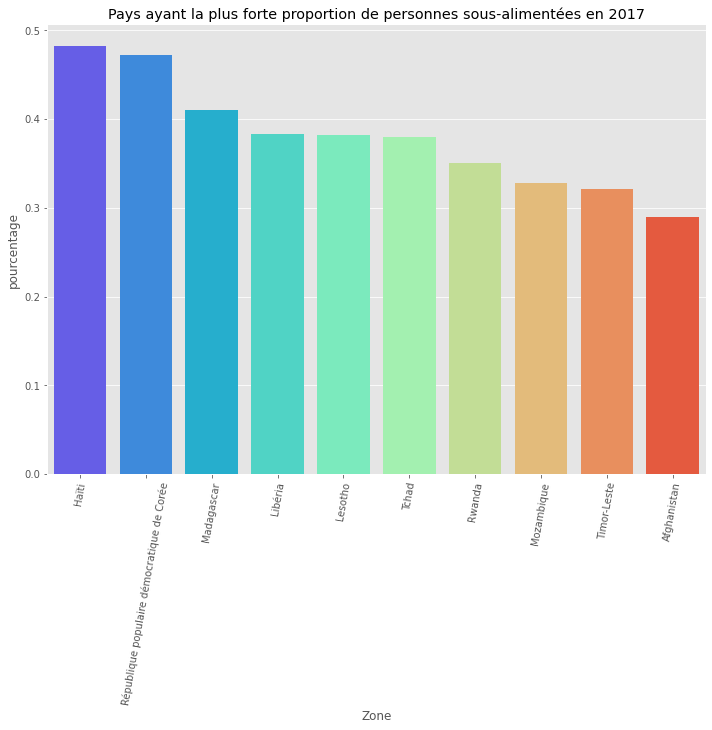

In [668]:
top_10_sous_nut=df_population_sous_nutrition[["Zone", "pourcentage"]].sort_values("pourcentage",ascending=False)[:10]
plt.figure(figsize = (10, 10))
sns.barplot(data = top_10_sous_nut, x = 'Zone', y = "pourcentage", palette =  "rainbow")
plt.xticks(rotation=80)
plt.tight_layout()
plt.title('Pays ayant la plus forte proportion de personnes sous-alimentées en 2017')

plt.show()



### Question 2 Pays plus bénéficié d'aide

In [604]:
pays_benef=df_aide_alimentaire[['Pays bénéficiaire','Valeur']].groupby(by =["Pays bénéficiaire"]).sum()
pays_benef.sort_values('Valeur',ascending=False).iloc[:10]

,Valeur
Pays bénéficiaire,
République arabe syrienne,1858943000
Éthiopie,1381294000
Yémen,1206484000
Soudan du Sud,695248000
Soudan,669784000
Kenya,552836000
Bangladesh,348188000
Somalie,292678000
République démocratique du Congo,288502000


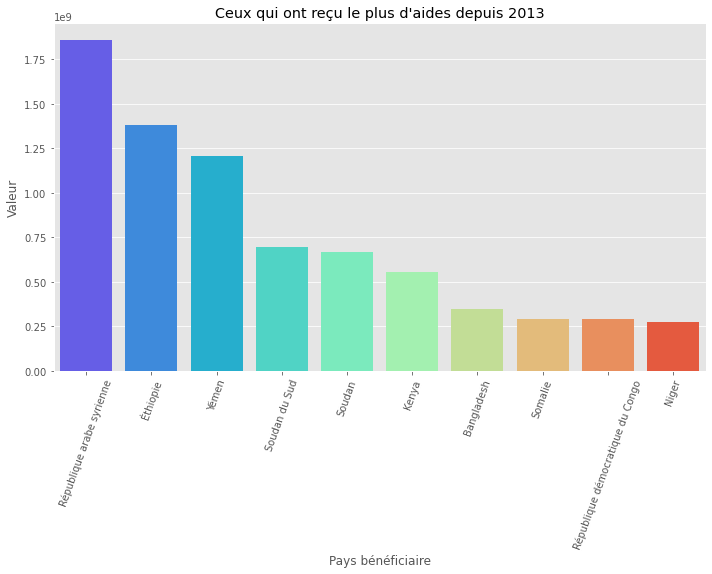

In [669]:
benef =pays_benef.sort_values(by="Valeur", ascending =  False)[:10]
plt.figure(figsize = (10, 8))
sns.barplot(data = benef, x = benef.index , y ="Valeur", palette = "rainbow")
plt.xticks(rotation=70)
plt.tight_layout()
plt.title("Ceux qui ont reçu le plus d'aides depuis 2013")

plt.show()

In [532]:
df_aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


### Question 3: Ceux ayant le plus de disponibilité/habitant

In [618]:
data = df_dispo_alimentaire[["Zone","Produit", "Disponibilité alimentaire (Kcal/personne/jour)"]].groupby("Zone").agg("sum")
data[["Disponibilité alimentaire (Kcal/personne/jour)"]].sort_values(by="Disponibilité alimentaire (Kcal/personne/jour)", ascending=False).iloc[:10]

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


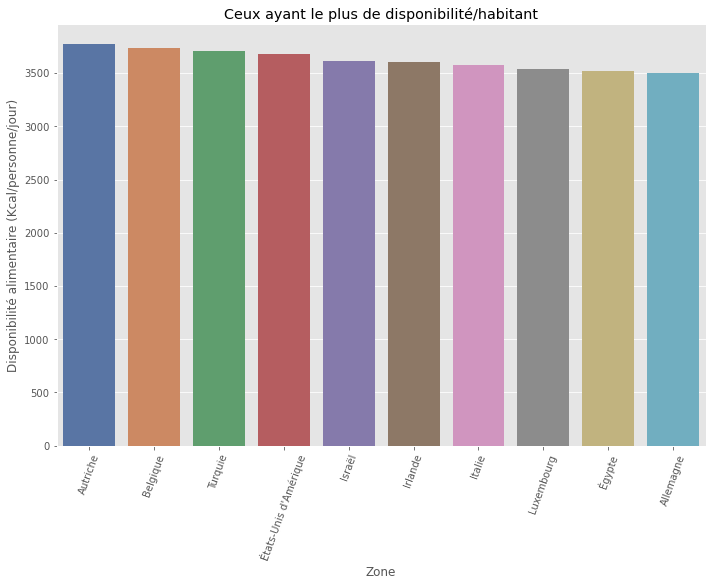

In [622]:
top10_nutri =  data.sort_values(by="Disponibilité alimentaire (Kcal/personne/jour)", ascending =  False)[:10]
plt.figure(figsize = (10, 8))
sns.barplot(data = top10_nutri, x = top10_nutri.index, y = 'Disponibilité alimentaire (Kcal/personne/jour)', palette = "deep")
plt.xticks(rotation=70)
plt.tight_layout()
plt.title('Ceux ayant le plus de disponibilité/habitant')

plt.show()

### Question 4: Ceux ayant le moins de disponibilité/habitant

In [623]:
data = df_dispo_alimentaire[["Zone","Produit", "Disponibilité alimentaire (Kcal/personne/jour)"]].groupby("Zone").agg("sum")
data[["Disponibilité alimentaire (Kcal/personne/jour)"]].sort_values(by="Disponibilité alimentaire (Kcal/personne/jour)", ascending=True).iloc[:10]

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


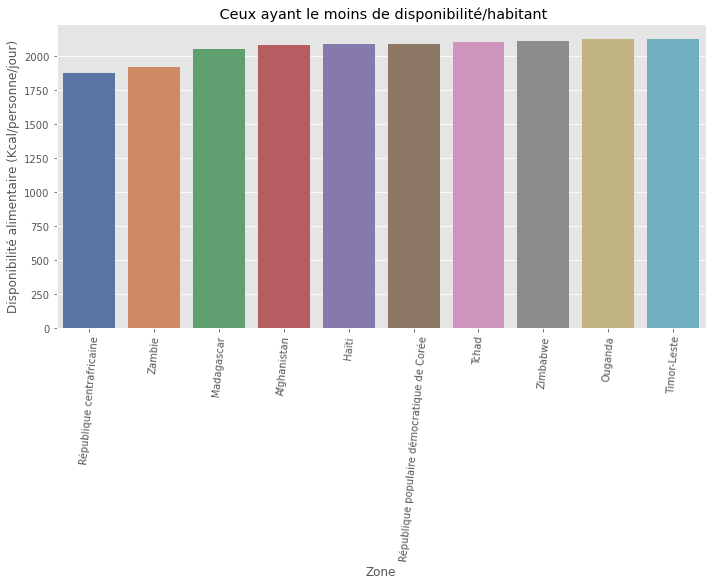

In [625]:
top10_nutri =  data.sort_values(by="Disponibilité alimentaire (Kcal/personne/jour)", ascending =  True)[:10]
plt.figure(figsize = (10, 8))
sns.barplot(data = top10_nutri, x = top10_nutri.index, y = 'Disponibilité alimentaire (Kcal/personne/jour)', palette = "deep")
plt.xticks(rotation=85)
plt.tight_layout()
plt.title(' Ceux ayant le moins de disponibilité/habitant')

plt.show()